In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from scipy.stats import norm, poisson
import seaborn as sb

#**Distribución Gaussiana**

x̄= 15.6 mm
s= 0.6 mm


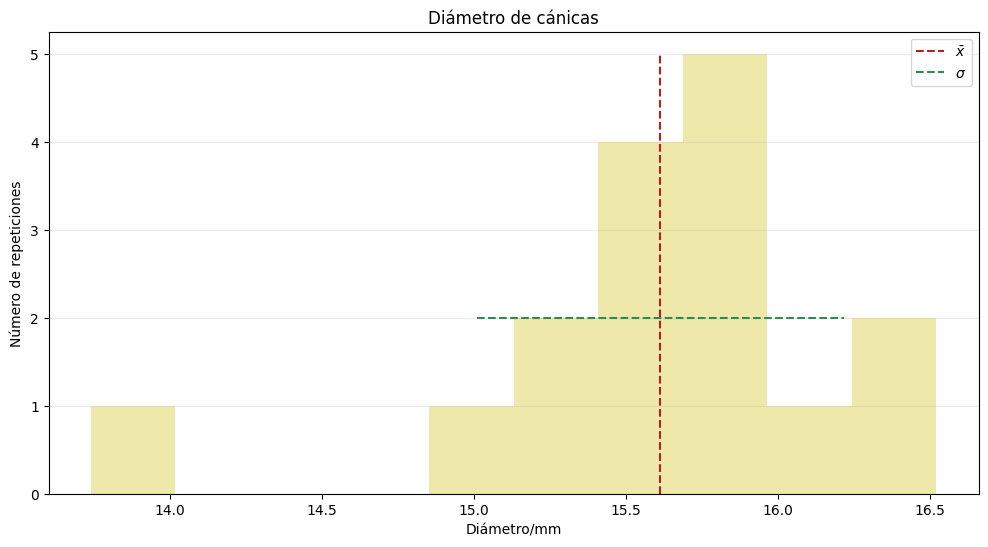

In [3]:
# 1
datos1= [13.740,15.050,15.240,15.255,15.630,15.630,15.640,15.665,15.700,15.730,15.830,15.910,15.935,15.980,16.345,16.520]
fig = plt.figure(figsize =(12, 6))

media = np.mean(datos1)
devS = np.std(datos1)

print("x̄= {:.1f} mm".format(media))
print("s= {:.1f} mm".format(devS))

plt.vlines(media,0,5,colors='firebrick',ls='--',label=r'$\bar x$')
plt.hist(datos1, bins="auto", color="palegoldenrod")
plt.hlines(2,media-devS,media+devS,colors='seagreen',ls='--',label=r'$\sigma$')
plt.xlabel("Diámetro/mm")
plt.ylabel("Número de repeticiones")
plt.title ("Diámetro de cánicas")
plt.grid(axis="y",alpha=0.25)
plt.legend()

x̄= 15.9 mm
s= 0.5 mm


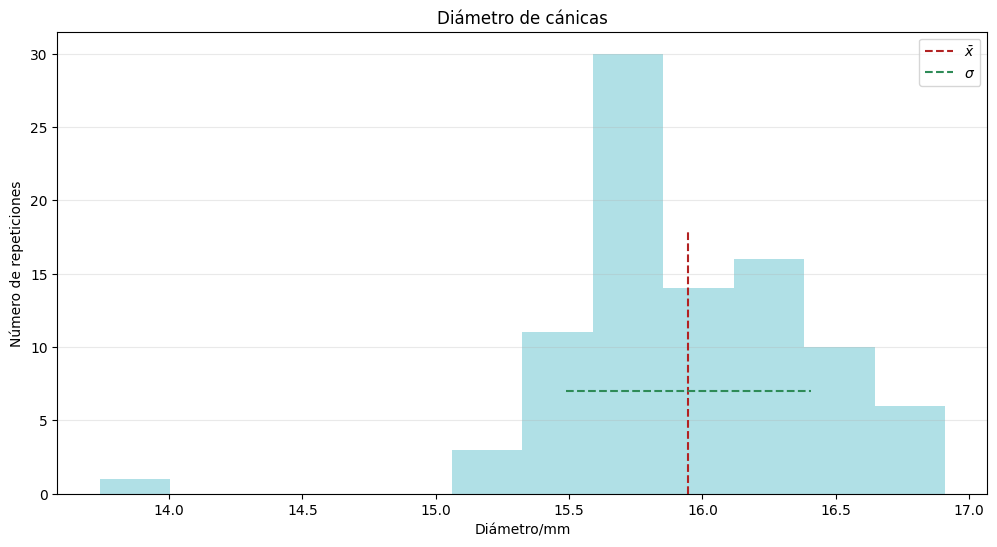

In [4]:
# 2
datos2=[
   13.740, 15.18,15.24,15.26,15.34,15.39,15.43,15.43,15.52,15.53,15.53,15.54,15.55,15.55,15.58,15.6,15.6,15.6,15.63,15.63,15.65,15.65,15.65,15.66,15.67,15.67,15.7,15.7,15.72,15.73,15.74,15.75,15.76,15.76,15.77,15.78,15.79,15.82,15.82,15.83,15.83,15.84,15.84,15.85,15.85,15.86,15.91,15.93,15.93,15.94,15.97,15.97,15.99,16,16.03,16.04,16.04,16.09,16.11,16.15,16.16,16.18,16.19,16.2,16.26,16.27,16.27,16.27,16.28,16.3,16.3,16.31,16.35,16.37,16.37,16.4,16.43,16.46,16.46,16.47,16.47,16.49,16.5,16.52,16.53,16.66,16.7,16.7,16.78,16.91,16.91
 ]

fig = plt.figure(figsize =(12, 6))
media = np.mean(datos2)
devS = np.std(datos2)

print("x̄= {:.1f} mm".format(media))
print("s= {:.1f} mm".format(devS))

plt.vlines(media,0,18,colors='firebrick',ls='--',label=r'$\bar x$')
plt.hlines(7,media-devS,media+devS,colors='seagreen',ls='--',label=r'$\sigma$')
plt.hist(datos2, bins="auto", color="powderblue")
plt.xlabel("Diámetro/mm")
plt.ylabel("Número de repeticiones")
plt.title ("Diámetro de cánicas")
plt.grid(axis="y",alpha=0.28)
plt.legend()

μ= 15.946483516483518
σ= 0.4588000920374455


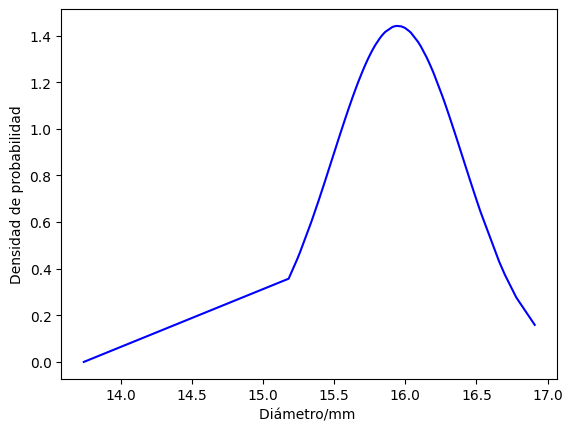

In [5]:
# Esta celda es para hallar mu y simgma, que en la celda de abajo representan a los parámetros media y desv
# https://www.askpython.com/python/normal-distribution
x = datos2
def normal_dist(x , mean , desv):
    den_prob = (np.pi*desv) * np.exp(-0.5*((x-mean)/desv)**2)
    return den_prob
media= np.mean(x)
desv= np.std(x)
pdf= normal_dist(x,media,desv)

plt.plot(x,pdf , color = "blue")
plt.xlabel("Diámetro/mm ")
plt.ylabel("Densidad de probabilidad")
print("μ=",media)
print("σ=", desv) # se supone que mu y sigma deben ser diferentes de x y s :(

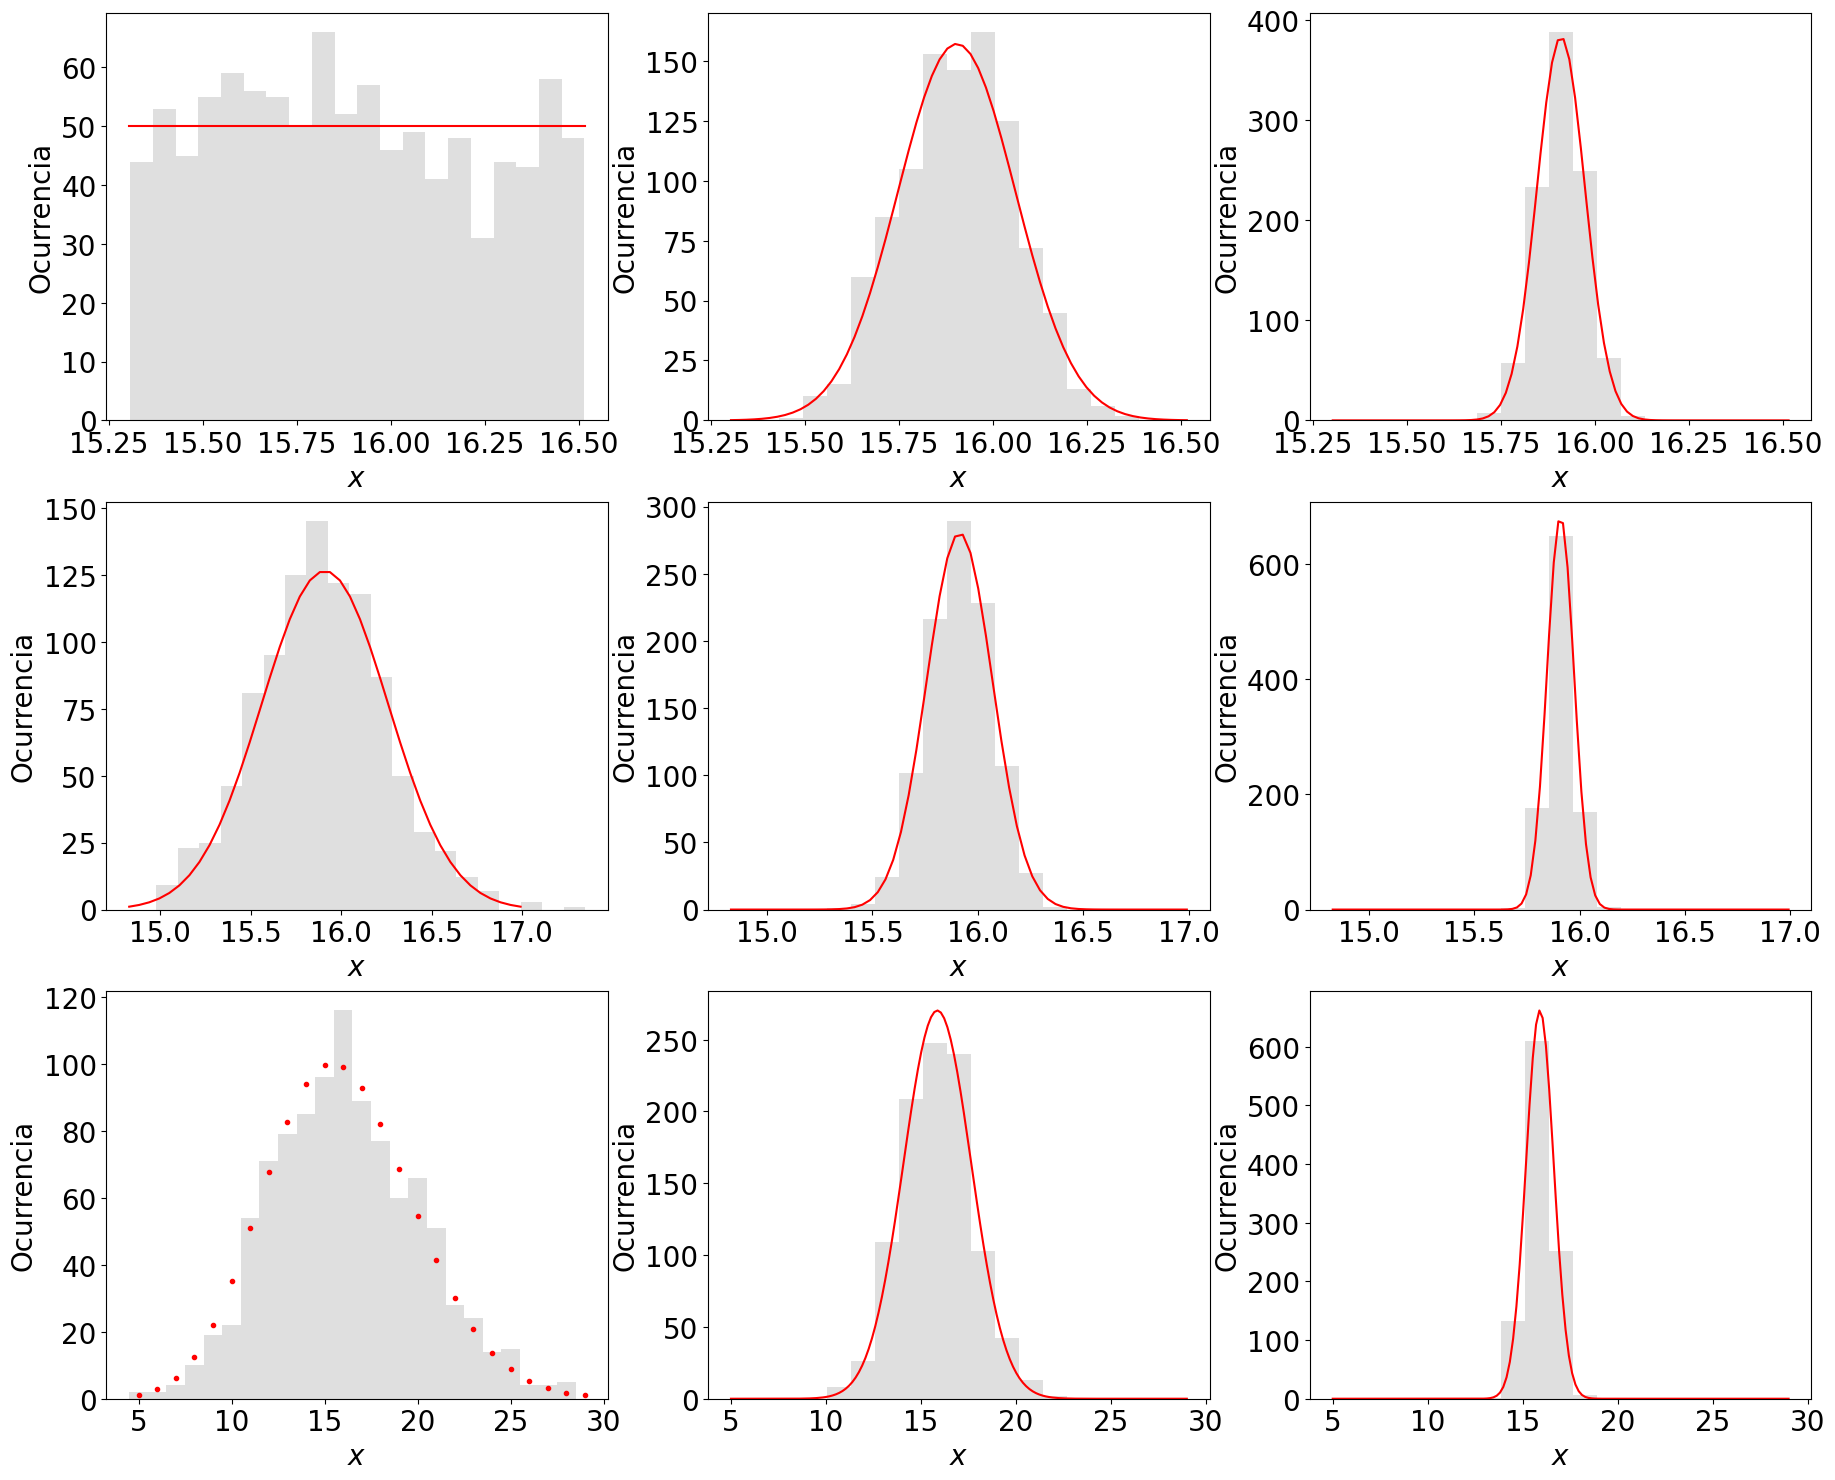

In [6]:
# 3 teorema del límite central
###### Parámetros ##################################################
media = 15.91      # media de la distribución
desv = 0.35     # Desviación estándar de la distribución
N = 1000         # Número de datos de la muestra de la distribución
semilla = 2      # Semilla usada para la generación de las variables aleatorias
n = 20           # Número de intervalos (bins) a graficas en los histogramas
grupA = 5        # Cantidad de datos agrupados en cada medida de la distribución muestral de la media (columna 2)
grupB = 30       # # Cantidad de datos agrupados en cada medida de la distribución muestral de la media (columna 3)
####################################################################

import numpy as np
import pylab as plt
from scipy import stats
from scipy.special import factorial
plt.rcParams.update({'font.size': 20})
np.random.seed(semilla)
figs, axs = plt.subplots(3,3,figsize=(22,18))

def diferP(val0,val):
    return 100*abs(val0-val)/val0


### Distribución Uniforme ###
#############################

def pdfUniform(media,desv):
    b = media + np.sqrt(12)*desv/2
    a = 2*media - b
    pdf = 1/(b-a)
    return a,b,pdf

# Creación de distribución aleatoria
a,b,pdfUni = pdfUniform(media,desv)
alUniforme = np.random.uniform(a,b,size=N)

## Creación de funciones de densidad
x = np.linspace(a,b,n)
dUni = N/(pdfUni*n)

## Agrupación A
UniA = []
for ii in range(N):
        UniA.append(np.mean(np.random.uniform(a,b,grupA)))

## Agrupación B
UniB = []
for ii in range(N):
        UniB.append(np.mean(np.random.uniform(a,b,grupB)))

## Grafica
axs[0,0].hist(alUniforme,bins=n, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
axs[0,0].plot(x,dUni*pdfUni*np.ones(n),color='r')

# Agrupación A
bins = np.linspace(a,b,n)
axs[0,1].hist(UniA,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
desvA = desv/np.sqrt(grupA)
mediaA = np.mean(UniA)
bins = np.linspace(a,b,3*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaA,scale=desvA)
dnormal = 3*len(UniA)*(bins[1]-bins[0])
axs[0,1].plot(bins,fUniforme2*dnormal,'r')


# Agrupación B
bins = np.linspace(a,b,n)
axs[0,2].hist(UniB,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
desvB = desv/np.sqrt(grupB)
mediaB = np.mean(UniB)
bins = np.linspace(a,b,4*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaB,scale=desvB)
dnormal = 4*len(UniB)*(bins[1]-bins[0])
axs[0,2].plot(bins,fUniforme2*dnormal,'r')


### Distribución normal ###
###########################

# creación distribución aletoria
alnormal = stats.norm.rvs(loc=media,scale=desv,size=N,random_state=semilla)

# creación de función densidad
x1 = np.linspace(stats.norm.ppf(0.001,loc=media,scale=desv),stats.norm.ppf(0.999,loc=media,scale=desv), 2*n)
fnormal = stats.norm.pdf(x1,loc=media,scale=desv)
dnormal = 2*N*(x1[1]-x1[0])

## Agrupación A
UniA = []
for ii in range(N):
        UniA.append(np.mean(stats.norm.rvs(loc=media,scale=desv,size=grupA,random_state=None)))

## Agrupación B
UniB = []
for ii in range(N):
        UniB.append(np.mean(stats.norm.rvs(loc=media,scale=desv,size=grupB,random_state=None)))

mediaA = np.mean(UniA)
mediaB = np.mean(UniB)

# Grafica
axs[1,0].hist(alnormal,bins=n, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
axs[1,0].plot(x1,fnormal*dnormal,'r')

# Agrupación A
bins = np.linspace(x1[0],x1[-1],n)
axs[1,1].hist(UniA,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x1[0],x1[-1],3*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaA,scale=desvA)
dnormal = 3*len(UniA)*(bins[1]-bins[0])
axs[1,1].plot(bins,fUniforme2*dnormal,'r')


# Agrupación B
bins = np.linspace(x1[0],x1[-1],n)
axs[1,2].hist(UniB,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x1[0],x1[-1],5*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaB,scale=desvB)
dnormal = 5*len(UniB)*(bins[1]-bins[0])
axs[1,2].plot(bins,fUniforme2*dnormal,'r')


### Distribución de Poisson ###
###############################

def distP(mu,x):
    return (mu**x)*np.exp(-mu)/factorial(x)

# creación distribución aleatorioa
#alpoisson = stats.poisson.rvs(media,loc=0,size=N,random_state=semilla)
#alpoisson = np.random.Generator.poisson(media,N)
rng = np.random.default_rng()
alpoisson = rng.poisson(media,N)

# creación de función densidad
x2 = np.arange(stats.poisson.ppf(0.001,media),stats.poisson.ppf(0.999,media))
#fpoisson = stats.poisson.pmf(x2,media)
fpoisson = distP(media,x2)

## Agrupación A
UniA = []
for ii in range(N):
        UniA.append(np.mean(rng.poisson(media,grupA)))

## Agrupación B
UniB = []
for ii in range(N):
        UniB.append(np.mean(rng.poisson(media,grupB)))

mediaA = np.mean(UniA)
mediaB = np.mean(UniB)
desvA = np.sqrt(media/grupA)
desvB = np.sqrt(media/grupB)

# Grafica
nn,bini,pp = axs[2,0].hist(alpoisson,bins=x2, histtype='stepfilled', align='left',color='silver', alpha=0.5)
axs[2,0].plot(x2,fpoisson*N,'r.')

# Agrupación A
bins = np.linspace(x2[0],x2[-1],n)
axs[2,1].hist(UniA,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x2[0],x2[-1],7*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaA,scale=desvA)
fUniforme3 = stats.norm.pdf(bins,loc=mediaA,scale=np.std(UniA))
dnormal = 7*len(UniA)*(bins[1]-bins[0])
axs[2,1].plot(bins,fUniforme2*dnormal,'r')
#axs[2,1].plot(bins,fUniforme3*dnormal,'gray')

# Agrupación B
bins = np.linspace(x2[0],x2[-1],n)
axs[2,2].hist(UniB,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x2[0],x2[-1],7*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaB,scale=desvB)
fUniforme3 = stats.norm.pdf(bins,loc=mediaB,scale=np.std(UniB))
dnormal = 7*len(UniB)*(bins[1]-bins[0])
axs[2,2].plot(bins,fUniforme2*dnormal,'r')
#axs[2,2].plot(bins,fUniforme3*dnormal,'gray')

for ax in axs.flat:
    ax.set(xlabel='$x$', ylabel='Ocurrencia')
plt.show()

4.Probabilidad diámetro entre 14.52 mm y 16.35 mm = 0.90069 %
5.Probabilidad diámetro mayor a 17.00 mm = 0.00084 %
6. Probabilidad diámetro menor que 14.3 = 0.00000 %


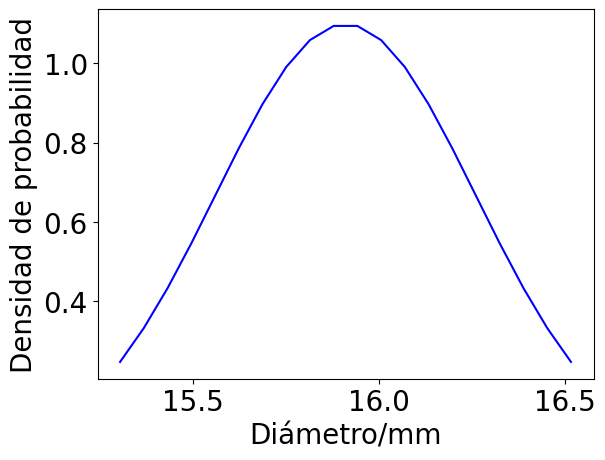

In [7]:
# 4 la probabilidad de encontrar cierto valor, es el área bajo la curva de la gráfica de la curva azul
# Creating the distribution
pdf= normal_dist(x,media,desv)

plt.plot(x,pdf , color = "blue")
plt.xlabel("Diámetro/mm")
plt.ylabel("Densidad de probabilidad")

# Intervalo de probabilidad

limite_superior= norm(loc = 15.9 , scale = 0.35).cdf(16.35)
limite_inferior= norm(loc = 15.9 , scale = 0.35).cdf(14.52)
prob1= limite_superior-limite_inferior
print("4.Probabilidad diámetro entre 14.52 mm y 16.35 mm = {:.5f} %".format(prob1))

cdf_value = norm(loc = 15.9 , scale = 0.35).cdf(17.0)
prob = 1- cdf_value
print("5.Probabilidad diámetro mayor a 17.00 mm = {:.5f} %".format(prob))
print("6. Probabilidad diámetro menor que 14.3 = {:.5f} %".format(norm(loc = 15.9 , scale = 0.35).cdf(14.3)))

# ***Distribución de Poisson***

x̄= 3 
s= 2 


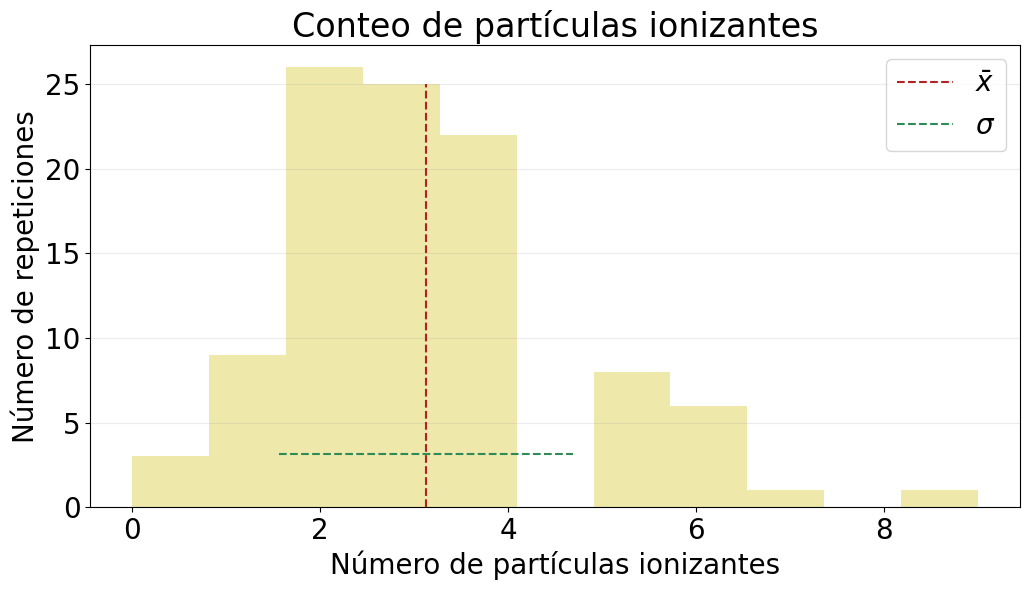

In [8]:
datos_p=[
    0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,7,9
]
fig = plt.figure(figsize =(12, 6))

media = np.mean(datos_p)
devS = np.std(datos_p)

print("x̄= {:.0f} ".format(media))
print("s= {:.0f} ".format(devS))

plt.vlines(media,0,25,colors='firebrick',ls='--',label=r'$\bar x$')
plt.hist(datos_p, bins="auto", color="palegoldenrod")
plt.hlines(2*devS,media-devS,media+devS,colors='seagreen',ls='--',label=r'$\sigma$')
plt.xlabel("Número de partículas ionizantes")
plt.ylabel("Número de repeticiones")
plt.title ("Conteo de partículas ionizantes")
plt.grid(axis="y",alpha=0.25)
plt.legend()

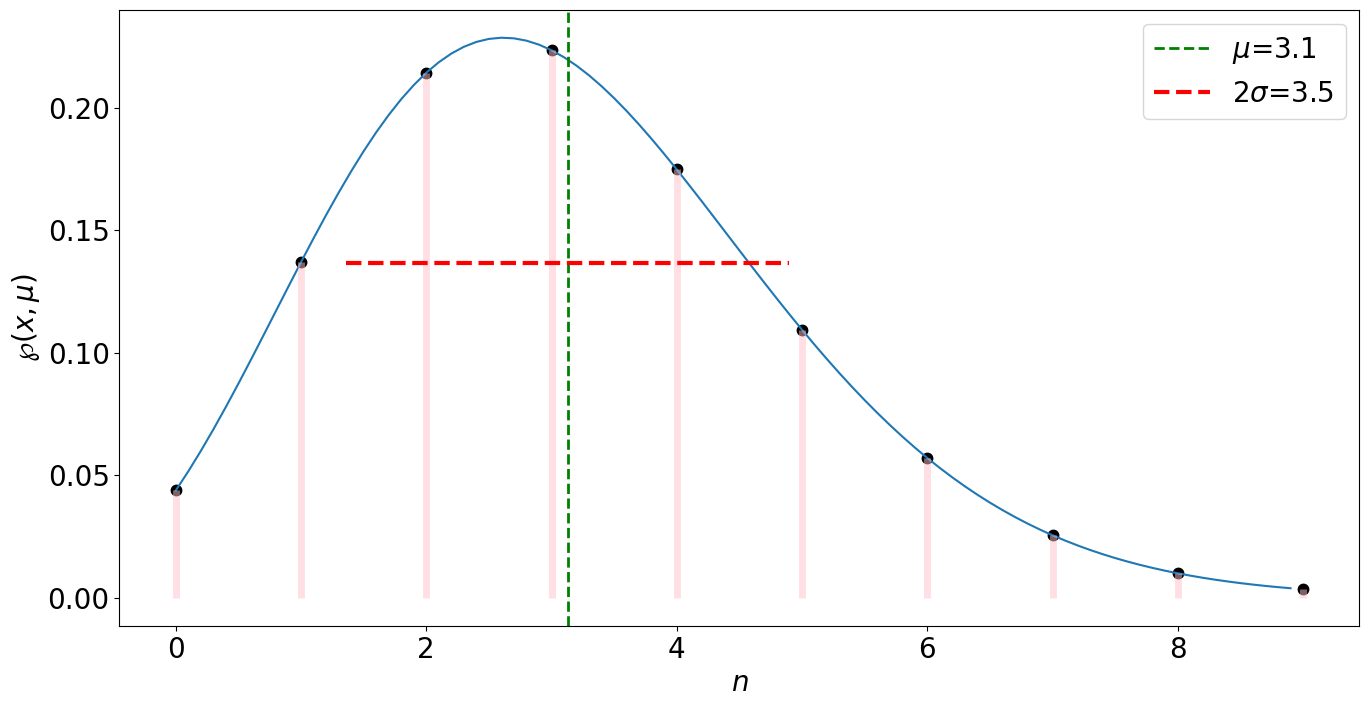

La probabilidad de que se produzcan 3 eventos de detección es 0.22344
La probabilidad de que se produzcan 3 eventos de detección es 0.043774


In [9]:
rango=9
mu=media
sigma = np.sqrt(media)
x = np.arange(0,rango,0.1)
xdisc = np.arange(0,rango+1,1.0)
def distP(mu,x):
    return (mu**x)*np.exp(-mu)/factorial(x)

plt.figure(figsize=(16,8))
plt.plot(xdisc,distP(mu,xdisc),'k.',ms=15)
plt.plot(x,distP(mu,x))
plt.vlines(xdisc,0, distP(mu,xdisc), colors='pink', lw=5, alpha=0.5)
plt.axvline(mu, linestyle='--', linewidth=2, c="green", label='$\mu$=%.1f'%mu)
plt.plot([mu-sigma, mu+sigma], [1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2)),
                                1/(np.sqrt(np.e)*np.sqrt(2*np.pi*sigma**2))], linewidth=3,
         linestyle="--", color="red", solid_capstyle="butt", label='$2\sigma$=%.1f'%(2*sigma))
plt.legend()
plt.xlabel('$n$')
plt.ylabel('$\wp(x,\mu)$')
plt.show()
print(f"La probabilidad de que se produzcan 3 eventos de detección es {distP(mu,3):.5}")
print(f"La probabilidad de que se produzcan 3 eventos de detección es {distP(mu,0):.5}")

In [11]:
largo=[295,282,312]
media2=np.average(largo)
#si fuesen de 10s
dividir=295/100
diferencia=media-dividir
